In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
import sklearn.model_selection
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
valid_part = 0.3
pd.set_option('max_columns',100)

In [3]:
taxi_df = pd.read_csv('/Users/rupesh/Downloads/dmmlfinalproject/datasets/yellow taxi trip data/yellow_tripdata_2021-12.csv')
taxi_df.head(5)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2021-12-01 00:19:51,2021-12-01 00:37:01,1.0,9.30,1.0,N,138,141,1,26.5,4.25,0.5,7.60,6.55,0.3,45.70,2.5
1,2,2021-12-01 00:29:07,2021-12-01 00:45:13,2.0,2.76,1.0,N,238,42,2,13.0,0.50,0.5,0.00,0.00,0.3,16.80,2.5
2,1,2021-12-01 00:12:40,2021-12-01 00:27:17,0.0,3.40,1.0,N,239,74,1,13.5,3.00,0.5,2.00,0.00,0.3,19.30,2.5
3,1,2021-12-01 00:10:18,2021-12-01 00:19:20,1.0,1.30,1.0,N,148,87,1,6.5,3.00,0.5,2.05,0.00,0.3,12.35,2.5
4,1,2021-12-01 00:25:12,2021-12-01 00:39:07,1.0,3.10,1.0,N,231,246,1,12.5,3.00,0.5,2.50,0.00,0.3,18.80,2.5


In [4]:
taxi_df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          102371
trip_distance                 0
RatecodeID               102371
store_and_fwd_flag       102371
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     102371
dtype: int64

In [5]:
taxi_df.rename(columns = {'tpep_pickup_datetime':'pickup_datetime', 'tpep_dropoff_datetime':'dropoff_datetime'}, inplace = True)
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [6]:
# For fetures with null value, I'll use mean to impute them.
taxi_df['passenger_count'] = taxi_df['passenger_count'].fillna(taxi_df['passenger_count'].mean())
taxi_df['RatecodeID'] = taxi_df['RatecodeID'].fillna(taxi_df['RatecodeID'].mean())
taxi_df['congestion_surcharge'] = taxi_df['congestion_surcharge'].fillna(taxi_df['congestion_surcharge'].mean())

In [7]:
taxi_df.isna().sum()

VendorID                      0
pickup_datetime               0
dropoff_datetime              0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag       102371
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
dtype: int64

In [8]:
taxi_df = taxi_df.dropna()
taxi_df.shape

(3111998, 18)

In [9]:
data = taxi_df.sample(n=100000, random_state=2022)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2964221 to 3090823
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   pickup_datetime        100000 non-null  datetime64[ns]
 2   dropoff_datetime       100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  float64       
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  float64       
 6   store_and_fwd_flag     100000 non-null  object        
 7   PULocationID           100000 non-null  int64         
 8   DOLocationID           100000 non-null  int64         
 9   payment_type           100000 non-null  int64         
 10  fare_amount            100000 non-null  float64       
 11  extra                  100000 non-null  float64       
 12  mta_tax                100000 non-nul

In [11]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2964221 to 3090823
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   pickup_datetime        100000 non-null  int64  
 2   dropoff_datetime       100000 non-null  int64  
 3   passenger_count        100000 non-null  float64
 4   trip_distance          100000 non-null  float64
 5   RatecodeID             100000 non-null  float64
 6   store_and_fwd_flag     100000 non-null  int64  
 7   PULocationID           100000 non-null  int64  
 8   DOLocationID           100000 non-null  int64  
 9   payment_type           100000 non-null  int64  
 10  fare_amount            100000 non-null  float64
 11  extra                  100000 non-null  float64
 12  mta_tax                100000 non-null  float64
 13  tip_amount             100000 non-null  float64
 14  tolls_amount           100000

In [13]:
data['passenger_count'] = data['passenger_count'].astype(int)
data['trip_distance'] = data['trip_distance'].astype(int)
data['RatecodeID'] = data['RatecodeID'].astype(int)
data['fare_amount'] = data['fare_amount'].astype(int)
data['extra'] = data['extra'].astype(int)

data['mta_tax'] = data['mta_tax'].astype(int)
data['tip_amount'] = data['tip_amount'].astype(int)
data['tolls_amount'] = data['tolls_amount'].astype(int)
data['improvement_surcharge'] = data['improvement_surcharge'].astype(int)
data['total_amount'] = data['total_amount'].astype(int)
data['congestion_surcharge'] = data['congestion_surcharge'].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2964221 to 3090823
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   VendorID               100000 non-null  int64
 1   pickup_datetime        100000 non-null  int64
 2   dropoff_datetime       100000 non-null  int64
 3   passenger_count        100000 non-null  int64
 4   trip_distance          100000 non-null  int64
 5   RatecodeID             100000 non-null  int64
 6   store_and_fwd_flag     100000 non-null  int64
 7   PULocationID           100000 non-null  int64
 8   DOLocationID           100000 non-null  int64
 9   payment_type           100000 non-null  int64
 10  fare_amount            100000 non-null  int64
 11  extra                  100000 non-null  int64
 12  mta_tax                100000 non-null  int64
 13  tip_amount             100000 non-null  int64
 14  tolls_amount           100000 non-null  int64
 15  improvemen

In [15]:
data.describe()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000
mean,1.691350,48659.032060,48634.551710,1.446320,2.863850,1.184140,0.02277,165.054220,162.696270,1.255140,13.723310,0.874240,0.000030,2.277010,0.459650,0.0,20.034740,1.840540
std,0.461939,28106.906565,28104.039242,1.021278,4.476366,3.370873,0.14917,65.371949,70.259076,0.476724,12.948454,1.174291,0.009487,3.075293,1.786982,0.0,16.344832,0.572831
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,-119.000000,-4.000000,0.000000,-1.000000,-22.000000,0.0,-130.000000,-2.000000
25%,1.000000,24334.750000,24330.750000,1.000000,1.000000,1.000000,0.00000,132.000000,113.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,11.000000,2.000000
50%,2.000000,48627.500000,48595.500000,1.000000,1.000000,1.000000,0.00000,162.000000,162.000000,1.000000,10.000000,0.000000,0.000000,2.000000,0.000000,0.0,15.000000,2.000000
75%,2.000000,72970.000000,72941.250000,2.000000,3.000000,1.000000,0.00000,234.000000,234.000000,1.000000,15.000000,2.000000,0.000000,3.000000,0.000000,0.0,21.000000,2.000000
max,2.000000,97452.000000,97446.000000,6.000000,243.000000,99.000000,1.00000,265.000000,265.000000,4.000000,450.000000,8.000000,3.000000,270.000000,41.000000,0.0,469.000000,2.000000


In [16]:
data = data[data['total_amount'] > 0]
data = data[data['congestion_surcharge'] >= 0]
data = data[data['tolls_amount'] >= 0]
data = data[data['tip_amount'] >= 0]
data = data[data['extra'] >= 0]
data = data[data['fare_amount'] > 0]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99415 entries, 2964221 to 3090823
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   VendorID               99415 non-null  int64
 1   pickup_datetime        99415 non-null  int64
 2   dropoff_datetime       99415 non-null  int64
 3   passenger_count        99415 non-null  int64
 4   trip_distance          99415 non-null  int64
 5   RatecodeID             99415 non-null  int64
 6   store_and_fwd_flag     99415 non-null  int64
 7   PULocationID           99415 non-null  int64
 8   DOLocationID           99415 non-null  int64
 9   payment_type           99415 non-null  int64
 10  fare_amount            99415 non-null  int64
 11  extra                  99415 non-null  int64
 12  mta_tax                99415 non-null  int64
 13  tip_amount             99415 non-null  int64
 14  tolls_amount           99415 non-null  int64
 15  improvement_surcharge  99415

In [18]:
data.corr()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,-0.000625,-0.000476,0.112693,0.018140,-0.046446,-0.222915,-0.008451,0.004824,-0.032638,0.025497,-0.848858,-0.004729,0.020543,0.015918,NaN,0.027347,-0.001580
pickup_datetime,-0.000625,1.000000,0.999987,0.025613,0.021158,0.009697,0.004207,-0.011986,-0.020324,0.067089,-0.004251,-0.003815,-0.001720,-0.031399,0.004739,NaN,-0.011169,-0.042872
dropoff_datetime,-0.000476,0.999987,1.000000,0.025744,0.022180,0.009803,0.004165,-0.012158,-0.020479,0.067113,-0.003194,-0.003848,-0.001722,-0.030810,0.005403,NaN,-0.010130,-0.043058
passenger_count,0.112693,0.025613,0.025744,1.000000,0.030053,-0.011283,-0.028528,-0.007717,-0.007151,0.012744,0.033363,-0.085471,-0.001387,0.014550,0.031931,NaN,0.034102,0.012349
trip_distance,0.018140,0.021158,0.022180,0.030053,1.000000,0.062159,-0.012962,-0.106313,-0.102581,-0.011016,0.856748,0.036524,-0.001325,0.520448,0.626353,NaN,0.857414,-0.256304
RatecodeID,-0.046446,0.009697,0.009803,-0.011283,0.062159,1.000000,-0.004470,-0.026741,-0.020186,-0.018981,0.115350,-0.026363,-0.000172,0.013909,0.064080,NaN,0.095207,-0.152625
store_and_fwd_flag,-0.222915,0.004207,0.004165,-0.028528,-0.012962,-0.004470,1.000000,0.003957,0.001512,0.014812,-0.013920,0.185260,-0.000486,-0.017259,-0.011856,NaN,-0.016625,-0.005682
PULocationID,-0.008451,-0.011986,-0.012158,-0.007717,-0.106313,-0.026741,0.003957,1.000000,0.077722,-0.031111,-0.101435,0.012536,-0.000053,-0.052431,-0.070851,NaN,-0.096688,0.122169
DOLocationID,0.004824,-0.020324,-0.020479,-0.007151,-0.102581,-0.020186,0.001512,0.077722,1.000000,-0.032021,-0.101743,0.010984,0.003759,-0.044701,-0.071918,NaN,-0.093428,0.120400
payment_type,-0.032638,0.067089,0.067113,0.012744,-0.011016,-0.018981,0.014812,-0.031111,-0.032021,1.000000,-0.016008,0.004780,-0.001725,-0.404364,-0.024860,NaN,-0.107194,-0.089554


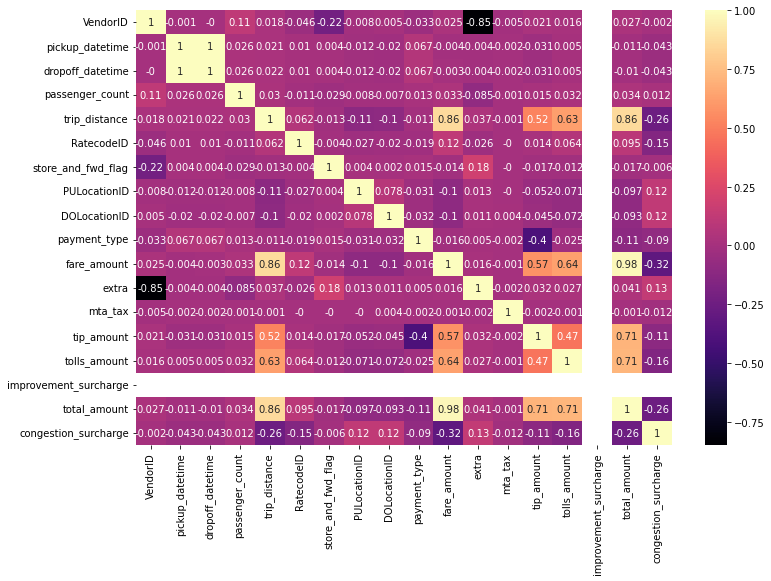

In [19]:
# heatmap to find correlation

plt.figure(figsize = (12,8))
sns.heatmap(np.round(data.corr(), 3), annot= True,  cmap= 'magma')
plt.show()

## Modelling

In [20]:
train_target0 = data['fare_amount']
data = data.drop(['fare_amount'], axis=1)

In [21]:
train0=data
# Synthesis test0 from train0
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [22]:
# For boosting model
train0b = train0
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [23]:
#For models from Sklearn
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [24]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [25]:
train.head(3)

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
41030,0.671464,0.868875,0.867295,4.446306,-0.638525,-0.053744,-0.153035,1.497102,1.427342,-0.543734,-0.748500,-0.003546,0.227506,-0.261182,0.0,-0.637762,0.275351
19743,0.671464,1.126925,1.127686,0.540363,0.248777,-0.053744,-0.153035,0.320422,-1.077661,1.681566,0.101997,-0.003546,-0.734634,-0.261182,0.0,0.171118,0.275351
63497,0.671464,-1.509148,-1.509794,-0.436123,-0.638525,-0.053744,-0.153035,0.992810,-0.892632,-0.543734,0.101997,-0.003546,-0.093207,-0.261182,0.0,-0.388876,0.275351


In [26]:
test.head(3)

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
71094,-1.489283,0.222200,0.222904,-0.436123,0.026951,-0.053744,-0.153035,0.320422,1.071518,1.681566,1.802992,-0.003546,-0.734634,-0.261182,0.0,0.108896,0.275351
18413,-1.489283,-1.333934,-1.329721,-0.436123,4.019808,0.254719,-0.153035,-0.504782,-0.280614,-0.543734,1.802992,-0.003546,1.189646,3.111772,0.0,3.033308,0.275351
49370,-1.489283,0.295639,0.295817,0.540363,-0.194874,-0.053744,-0.153035,0.075917,-1.248456,-0.543734,0.952495,-0.003546,0.868933,-0.261182,0.0,0.233339,0.275351


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55672 entries, 41030 to 68268
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               55672 non-null  float64
 1   pickup_datetime        55672 non-null  float64
 2   dropoff_datetime       55672 non-null  float64
 3   passenger_count        55672 non-null  float64
 4   trip_distance          55672 non-null  float64
 5   RatecodeID             55672 non-null  float64
 6   store_and_fwd_flag     55672 non-null  float64
 7   PULocationID           55672 non-null  float64
 8   DOLocationID           55672 non-null  float64
 9   payment_type           55672 non-null  float64
 10  extra                  55672 non-null  float64
 11  mta_tax                55672 non-null  float64
 12  tip_amount             55672 non-null  float64
 13  tolls_amount           55672 non-null  float64
 14  improvement_surcharge  55672 non-null  float64
 15

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23860 entries, 71094 to 40804
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               23860 non-null  float64
 1   pickup_datetime        23860 non-null  float64
 2   dropoff_datetime       23860 non-null  float64
 3   passenger_count        23860 non-null  float64
 4   trip_distance          23860 non-null  float64
 5   RatecodeID             23860 non-null  float64
 6   store_and_fwd_flag     23860 non-null  float64
 7   PULocationID           23860 non-null  float64
 8   DOLocationID           23860 non-null  float64
 9   payment_type           23860 non-null  float64
 10  extra                  23860 non-null  float64
 11  mta_tax                23860 non-null  float64
 12  tip_amount             23860 non-null  float64
 13  tolls_amount           23860 non-null  float64
 14  improvement_surcharge  23860 non-null  float64
 15

In [29]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [30]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5


In [31]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [32]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [33]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [ 4 19  8  5 10]
ytrain =  [ 3.46650929 18.94876198  7.67580183  5.80022049  8.81317906]
acc(r2_score) for train = 99.78
acc(relative error) for train = 3.53
acc(rmse) for train = 59.5
target_test = [18 52 16 16  4]
ytest = [18.09769424 51.74355879 15.55561596 16.33276905  4.45859524]
acc(r2_score) for test = 99.79
acc(relative error) for test = 3.48
acc(rmse) for test = 59.0


In [34]:
# Random Forest

random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(6,random_forest,train,test)

target =  [ 4 19  8  5 10]
ytrain =  [ 3.99 19.26  7.8   5.14  9.58]
acc(r2_score) for train = 99.82
acc(relative error) for train = 1.17
acc(rmse) for train = 53.93
target_test = [18 52 16 16  4]
ytest = [18.69 52.   14.4  16.25  4.52]
acc(r2_score) for test = 99.54
acc(relative error) for test = 3.04
acc(rmse) for test = 87.28


In [35]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(10,ridge,train,test)

target =  [ 4 19  8  5 10]
ytrain =  [ 3.46640857 18.94870282  7.67578909  5.79995504  8.81337649]
acc(r2_score) for train = 99.78
acc(relative error) for train = 3.53
acc(rmse) for train = 59.5
target_test = [18 52 16 16  4]
ytest = [18.09771606 51.74366919 15.55561948 16.33287366  4.4583698 ]
acc(r2_score) for test = 99.79
acc(relative error) for test = 3.48
acc(rmse) for test = 59.0


In [36]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(11,bagging,train,test)

target =  [ 4 19  8  5 10]
ytrain =  [ 3.9 19.3  7.8  5.   9.7]
acc(r2_score) for train = 99.84
acc(relative error) for train = 1.24
acc(rmse) for train = 49.98
target_test = [18 52 16 16  4]
ytest = [18.5 52.  14.3 16.1  4.5]
acc(r2_score) for test = 99.5
acc(relative error) for test = 3.13
acc(rmse) for test = 90.62


In [37]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(13,Ada_Boost,train,test)

target =  [ 4 19  8  5 10]
ytrain =  [10.24175617 15.69796234 10.24175617 10.24175617 10.64335664]
acc(r2_score) for train = 91.63
acc(relative error) for train = 21.01
acc(rmse) for train = 366.69
target_test = [18 52 16 16  4]
ytest = [14.35503078 53.22344792 14.35503078 15.69796234 10.24175617]
acc(r2_score) for test = 91.67
acc(relative error) for test = 20.83
acc(rmse) for test = 369.59


In [38]:
# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(4,sgd,train,test)

target =  [ 4 19  8  5 10]
ytrain =  [ 3.44957186 18.91214148  7.68291071  5.84297403  8.87200213]
acc(r2_score) for train = 99.78
acc(relative error) for train = 3.52
acc(rmse) for train = 59.79
target_test = [18 52 16 16  4]
ytest = [18.09127409 51.57407392 15.5927162  16.31547242  4.45607014]
acc(r2_score) for test = 99.78
acc(relative error) for test = 3.47
acc(rmse) for test = 59.58


In [39]:
# Voting Regressor

Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(14,Voting_Reg,train,test)

target =  [ 4 19  8  5 10]
ytrain =  [ 3.47125399 18.96293198  7.66191694  5.8012172   8.82158204]
acc(r2_score) for train = 99.78
acc(relative error) for train = 3.53
acc(rmse) for train = 59.51
target_test = [18 52 16 16  4]
ytest = [18.11479938 51.78819505 15.56315693 16.32589615  4.44511271]
acc(r2_score) for test = 99.79
acc(relative error) for test = 3.48
acc(rmse) for test = 59.02


In [40]:
a = {
    'Model': ['Linear Regression', 'Random Forest', 'RidgeRegressor', 'BaggingRegressor', 
            'AdaBoostRegressor', 'Stochastic Gradient Descent', 'Voting Regressor'],
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
    }
models = pd.DataFrame.from_dict(a, orient='index')
models

,0,1,2,3,4,5,6
Model,Linear Regression,Random Forest,RidgeRegressor,BaggingRegressor,AdaBoostRegressor,Stochastic Gradient Descent,Voting Regressor
r2_train,99.78,99.82,99.78,99.84,99.78,91.63,99.78
r2_test,99.79,99.54,99.79,99.5,99.78,91.67,99.79
d_train,3.53,1.17,3.53,1.24,3.52,21.01,3.53
d_test,3.48,3.04,3.48,3.13,3.47,20.83,3.48
rmse_train,59.5,53.93,59.5,49.98,59.79,366.69,59.51
rmse_test,59.0,87.28,59.0,90.62,59.58,369.59,59.02


In [41]:
new_header = models.iloc[0] #grab the first row for the header
models = models[1:] #take the data less the header row
models.columns = new_header #set the header row as the df header
models

Model,Linear Regression,Random Forest,RidgeRegressor,BaggingRegressor,AdaBoostRegressor,Stochastic Gradient Descent,Voting Regressor
r2_train,99.78,99.82,99.78,99.84,99.78,91.63,99.78
r2_test,99.79,99.54,99.79,99.5,99.78,91.67,99.79
d_train,3.53,1.17,3.53,1.24,3.52,21.01,3.53
d_test,3.48,3.04,3.48,3.13,3.47,20.83,3.48
rmse_train,59.5,53.93,59.5,49.98,59.79,366.69,59.51
rmse_test,59.0,87.28,59.0,90.62,59.58,369.59,59.02


In [42]:
df1_transposed = models.T # or df1.transpose()
models.columns

Index(['Linear Regression', 'Random Forest', 'RidgeRegressor',
       'BaggingRegressor', 'AdaBoostRegressor', 'Stochastic Gradient Descent',
       'Voting Regressor'],
      dtype='object', name='Model')

In [43]:
df1_transposed.columns

Index(['r2_train', 'r2_test', 'd_train', 'd_test', 'rmse_train', 'rmse_test'], dtype='object')

In [44]:
pd.options.display.float_format = '{:,.2f}'.format

In [45]:
print('Prediction accuracy for models by R2 criterion - r2_test')
df1_transposed.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
Model,,,,,,
Linear Regression,99.78,99.79,3.53,3.48,59.50,59.00
RidgeRegressor,99.78,99.79,3.53,3.48,59.50,59.00
Voting Regressor,99.78,99.79,3.53,3.48,59.51,59.02
AdaBoostRegressor,99.78,99.78,3.52,3.47,59.79,59.58
Random Forest,99.82,99.54,1.17,3.04,53.93,87.28
BaggingRegressor,99.84,99.50,1.24,3.13,49.98,90.62
Stochastic Gradient Descent,91.63,91.67,21.01,20.83,366.69,369.59


In [46]:
print('Prediction accuracy for models by RMSE - rmse_test')
df1_transposed.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
Model,,,,,,
Linear Regression,99.78,99.79,3.53,3.48,59.50,59.00
RidgeRegressor,99.78,99.79,3.53,3.48,59.50,59.00
Voting Regressor,99.78,99.79,3.53,3.48,59.51,59.02
AdaBoostRegressor,99.78,99.78,3.52,3.47,59.79,59.58
Random Forest,99.82,99.54,1.17,3.04,53.93,87.28
BaggingRegressor,99.84,99.50,1.24,3.13,49.98,90.62
Stochastic Gradient Descent,91.63,91.67,21.01,20.83,366.69,369.59


In [47]:
df1_transposed = df1_transposed.reset_index()
df1_transposed

,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
0,Linear Regression,99.78,99.79,3.53,3.48,59.50,59.00
1,Random Forest,99.82,99.54,1.17,3.04,53.93,87.28
2,RidgeRegressor,99.78,99.79,3.53,3.48,59.50,59.00
3,BaggingRegressor,99.84,99.50,1.24,3.13,49.98,90.62
4,AdaBoostRegressor,99.78,99.78,3.52,3.47,59.79,59.58
5,Stochastic Gradient Descent,91.63,91.67,21.01,20.83,366.69,369.59
6,Voting Regressor,99.78,99.79,3.53,3.48,59.51,59.02


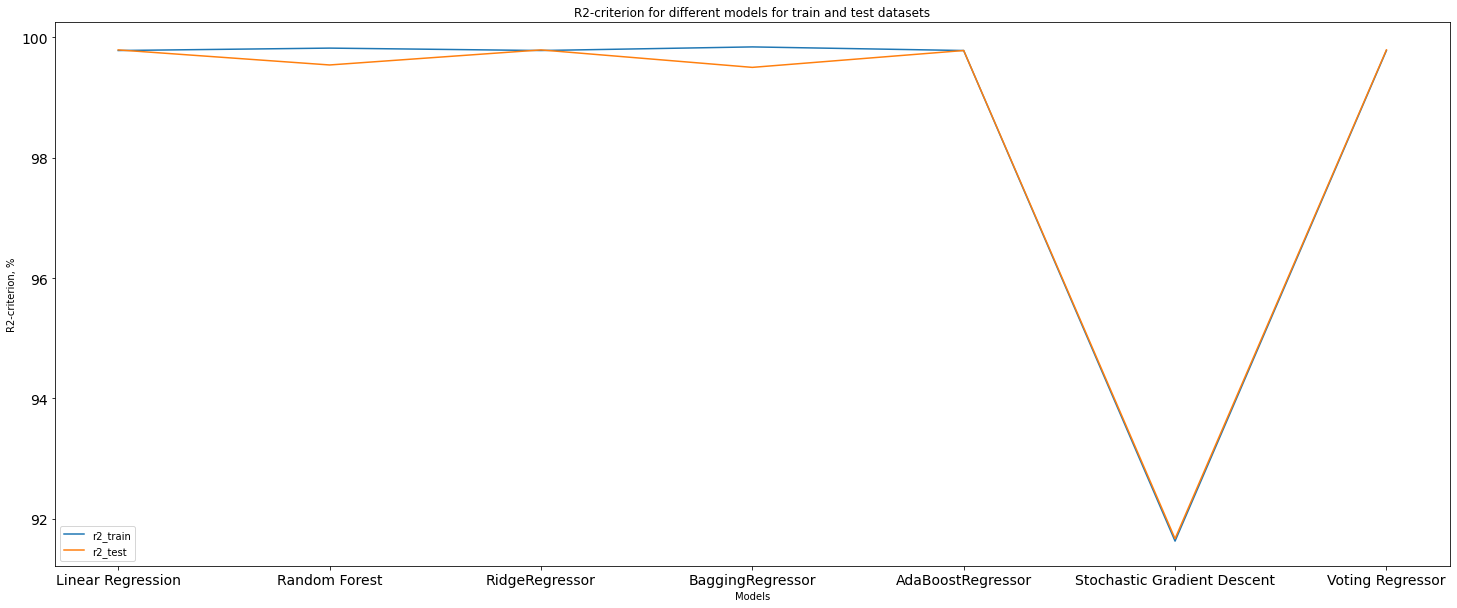

In [48]:
# Plot
plt.figure(figsize=[25,10])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['r2_train'], label = 'r2_train')
plt.plot(xx, df1_transposed['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx)
plt.show()

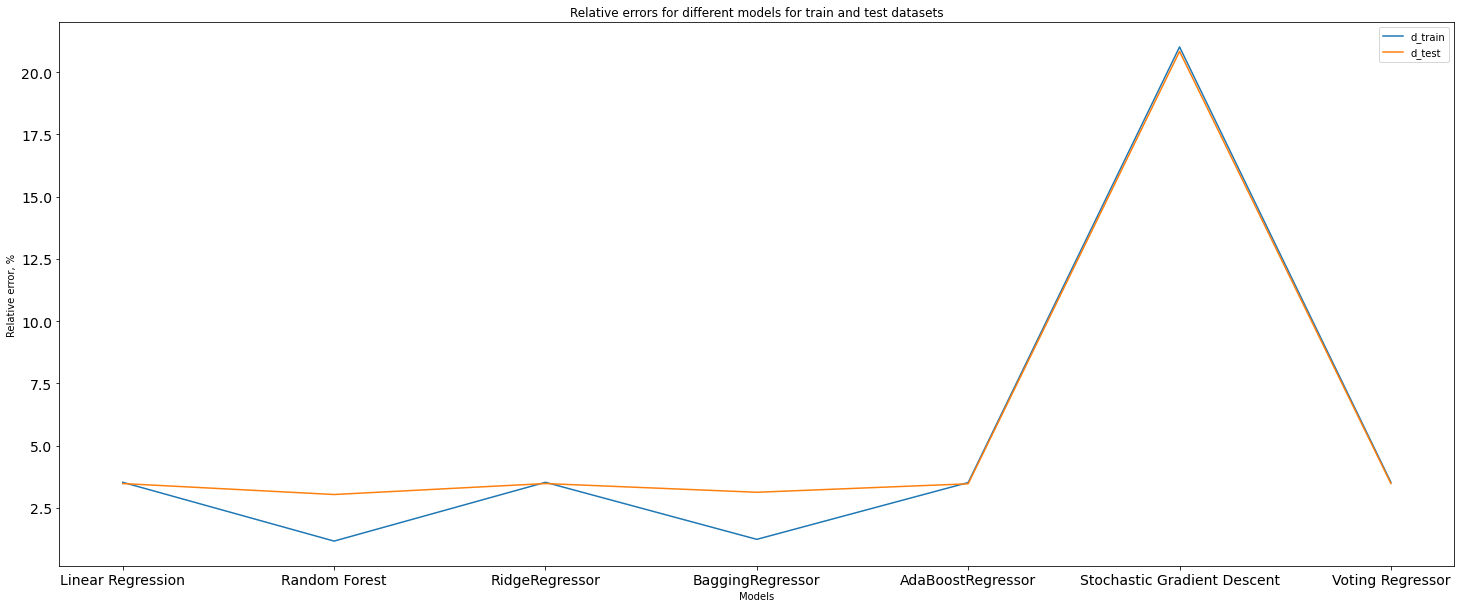

In [49]:
# Plot
plt.figure(figsize=[25,10])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['d_train'], label = 'd_train')
plt.plot(xx, df1_transposed['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx)
plt.show()

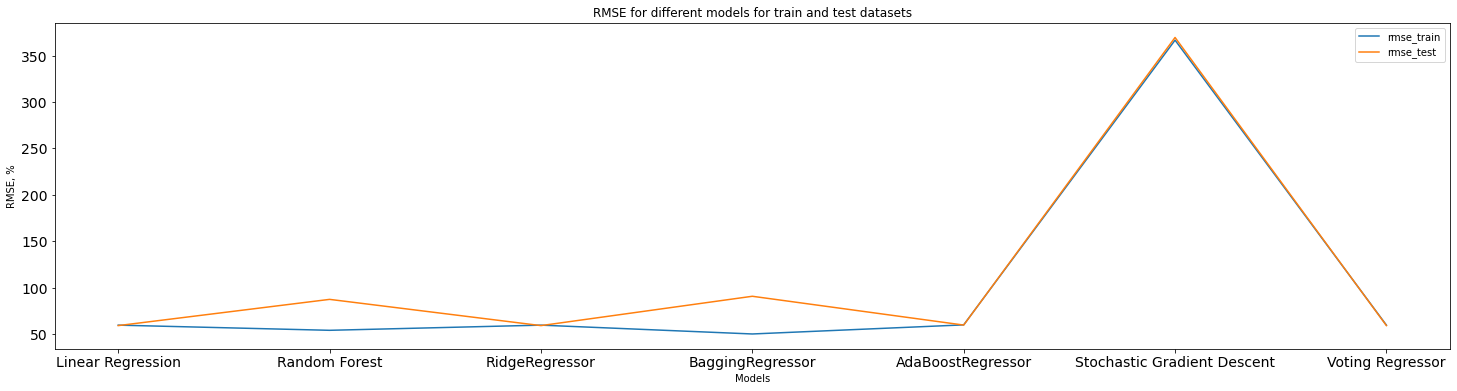

In [50]:
# Plot
plt.figure(figsize=[25,6])
xx = df1_transposed['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, df1_transposed['rmse_train'], label = 'rmse_train')
plt.plot(xx, df1_transposed['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for different models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx)
plt.show()